In [2]:
import ROOT

# Read Files

In [9]:
f_zjtoll_m4to50 = ROOT.TFile("bkg_root/DYJetsToLL.root","READ")
f_zjtoll_tunecp5 = ROOT.TFile("bkg_root/DYJetsToLLTuneCP5.root","READ")
f_zjtoll_tunecp5_m50 = ROOT.TFile("bkg_root/DYJetsToLLTuneCP5_M-50.root","READ")
f_zjtoll_m_50BGF = ROOT.TFile("bkg_root/DYJetsToLLTuneCP5_M-50BGF_zpt.root","READ")

f_qcd = ROOT.TFile("bkg_root/QCD_Bkg.root","READ")

f_tt = ROOT.TFile("bkg_root/TTToSemiLeptonic.root","READ")

f_st_t = ROOT.TFile("bkg_root/single_t_t.root","READ")
f_st_s = ROOT.TFile("bkg_root/single_t_s.root","READ")

f_zzto2l2q = ROOT.TFile("bkg_root/diboson_bkg_ZZTo2L2Q.root","READ")
f_zz_tunecp5 = ROOT.TFile("bkg_root/diboson_bkg_ZZ_TuneCP5.root","READ")

f_sig = ROOT.TFile("zpeak_sig.root","READ")

TFile: name=bkg_root/diboson_bkg_ZZ_TuneCP5.root, title=, option=READ


# Read histograms and Classify

In [10]:
# bkg
zjtoll_m4to50 = ROOT.TH1F()
zjtoll_tunecp5 = ROOT.TH1F()
zjtoll_tunecp5_m50 = ROOT.TH1F()
zjtoll_m_50BGF = ROOT.TH1F()

qcd = ROOT.TH1F()

tt = ROOT.TH1F()
st_t = ROOT.TH1F()
st_s = ROOT.TH1F()

zzto2l2q = ROOT.TH1F()
zz_tunecp5 = ROOT.TH1F()

# sig
sig = ROOT.TH1F()

# category
zjets = ROOT.TH1F()
st = ROOT.TH1F()
dib = ROOT.TH1F()

# read histograms
zjtoll_m4to50 = f_zjtoll_m4to50.Get("h_RecDiMuonM")
zjtoll_tunecp5 = f_zjtoll_tunecp5.Get("h_RecDiMuonM")
zjtoll_tunecp5_m50 = f_zjtoll_tunecp5_m50.Get("h_RecDiMuonM")
zjtoll_m_50BGF = f_zjtoll_m_50BGF.Get("h_RecDiMuonM")

qcd = f_qcd.Get("h_RecDiMuonM")

tt = f_tt.Get("h_RecDiMuonM")
st_t = f_st_t.Get("h_RecDiMuonM")
st_s = f_st_s.Get("h_RecDiMuonM")

zzto2l2q = f_zzto2l2q.Get("h_RecDiMuonM")
zz_tunecp5 = f_zz_tunecp5.Get("h_RecDiMuonM")

sig = f_sig.Get("h_RecDiMuonM")

# sum up different histograms (by categories)
zjets = zjtoll_m4to50 + zjtoll_tunecp5 + zjtoll_tunecp5_m50 + zjtoll_m_50BGF
st = st_t + st_s
dib = zzto2l2q + zz_tunecp5

# Plot stack

In [39]:
c = ROOT.TCanvas()
hs = ROOT.THStack("hs","The invariant mass spectrum of dimuon")

zjets.SetFillColor(ROOT.kRed)
zjets.SetLineColor(ROOT.kRed)
zjets.SetFillStyle(3002)
hs.Add(zjets)

st.SetFillColor(ROOT.kBlue)
st.SetLineColor(ROOT.kBlue)
st.SetFillStyle(3004)
hs.Add(st)

tt.SetFillColor(ROOT.kGreen - 2)
tt.SetLineColor(ROOT.kGreen - 2)
tt.SetFillStyle(3005)
hs.Add(tt)

qcd.SetFillColor(ROOT.kViolet)
qcd.SetLineColor(ROOT.kViolet)
qcd.SetFillStyle(3006)
hs.Add(qcd)

dib.SetFillColor(ROOT.kBlack)
dib.SetLineColor(ROOT.kBlack)
dib.SetFillStyle(3007)
hs.Add(dib)

sig.SetFillColor(ROOT.kOrange)
sig.SetLineColor(ROOT.kOrange)
sig.SetFillStyle(3001)
hs.Add(sig)

hs.Draw()

hs.GetXaxis().SetTitle("m_{#mu^{+}#mu^{-}}")
hs.GetYaxis().SetTitle("Events/0.5 GeV")
#c.SetLogy()

leg = ROOT.TLegend(0.7,0.7,0.9,0.9)
leg.AddEntry(zjets,"Z+jets","F")
leg.AddEntry(st,"Single top","F")
leg.AddEntry(tt,"Double top","F")
leg.AddEntry(qcd,"QCD background","F")
leg.AddEntry(dib,"Diboson","F")
leg.AddEntry(sig,"Signal","F")

leg.Draw()

Info in <TCanvas::Print>: pdf file stack.pdf has been created


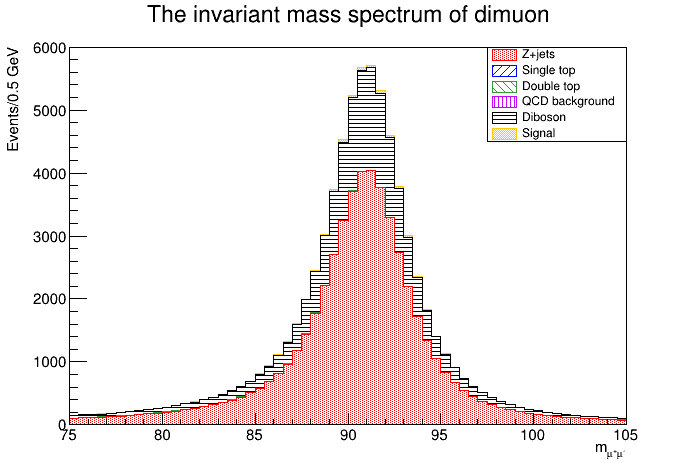

In [40]:
c.Draw()
c.SaveAs("stack.pdf")